<a href="https://colab.research.google.com/github/MareevaMI/PDA_SOL/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_5_(%D0%9C%D0%B0%D1%80%D0%B5%D0%B5%D0%B2%D0%B0_%D0%9C_%D0%98_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [21]:
## Задание 1.1. Загрузить, посмотреть, определить количество строк и объединить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.
us = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users.csv')
us.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [22]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   age_group           10037 non-null  object
 2   language_preferred  10037 non-null  object
dtypes: object(3)
memory usage: 235.4+ KB


In [23]:
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subscribers.csv')
sub.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [24]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   subscribing_channel  1856 non-null   object
 2   date_subscribed      1856 non-null   object
 3   date_canceled        577 non-null    object
 4   is_retained          1856 non-null   object
dtypes: object(5)
memory usage: 392.2+ KB


In [25]:
mc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv')
mc.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [26]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10022 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


In [27]:
df = us.merge(sub, 'outer').merge(mc, 'outer')
df.head()

,user_id,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,0-18 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
1,a1001,19-24 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
2,a1002,24-30 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
3,a1003,30-36 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
4,a1004,36-45 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   age_group            10037 non-null  object
 2   language_preferred   10037 non-null  object
 3   subscribing_channel  1856 non-null   object
 4   date_subscribed      1856 non-null   object
 5   date_canceled        577 non-null    object
 6   is_retained          1856 non-null   object
 7   date_served          10021 non-null  object
 8   marketing_channel    10022 non-null  object
 9   variant              10037 non-null  object
 10  language_displayed   10037 non-null  object
 11  converted            10022 non-null  object
dtypes: object(12)
memory usage: 1019.4+ KB


In [29]:
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])
df['date_canceled'] = pd.to_datetime(df['date_canceled'])
df['date_served'] = pd.to_datetime(df['date_served'])

In [30]:
df.dtypes

user_id                        object
age_group                      object
language_preferred             object
subscribing_channel            object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
is_retained                    object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
language_displayed             object
converted                      object
dtype: object

In [31]:
## Задание 1.2. Определить типы и статистики колонок.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   age_group            10037 non-null  object        
 2   language_preferred   10037 non-null  object        
 3   subscribing_channel  1856 non-null   object        
 4   date_subscribed      1856 non-null   datetime64[ns]
 5   date_canceled        577 non-null    datetime64[ns]
 6   is_retained          1856 non-null   object        
 7   date_served          10021 non-null  datetime64[ns]
 8   marketing_channel    10022 non-null  object        
 9   variant              10037 non-null  object        
 10  language_displayed   10037 non-null  object        
 11  converted            10022 non-null  object        
dtypes: datetime64[ns](3), object(9)
memory usage: 1019.4+ KB


Text(0.5, 1.0, 'Пользователи, совершившие покупку')

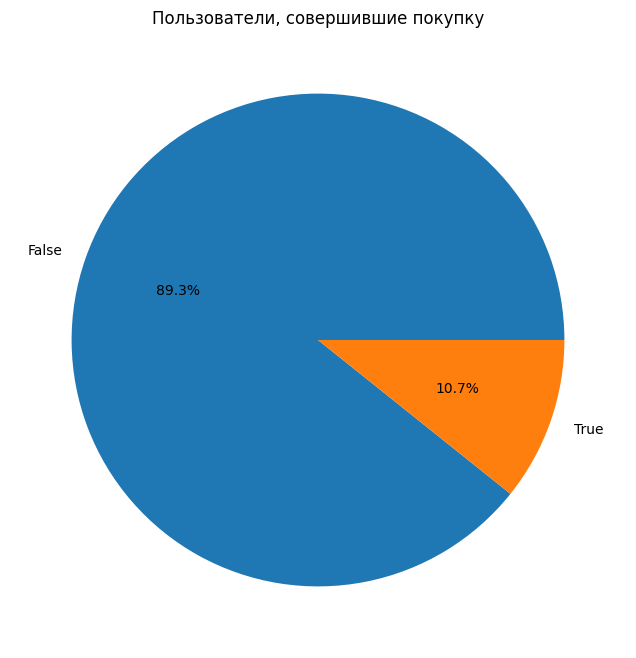

In [35]:
## Задание 1.3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.
df_ef = df.groupby('converted').size()

df_ef.plot(kind='pie',subplots=True, figsize=(8, 8), autopct='%1.1f%%')
plt.title("Пользователи, совершившие покупку")

In [36]:
## Вывод: 10% привлеченных пользователей совершили покупку, что является хорошим показателем

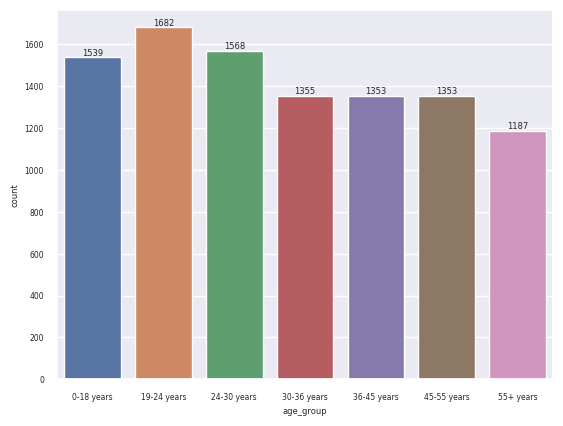

In [37]:
## Задание 1.4. Определить количество игроков в каждой возрастной группе.
sns.set(font_scale=0.5)
ax = sns.countplot(x='age_group', data=df)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [38]:
## Вывод: меньше всего игроков в возрастной группе 55+ лет, больше всего в возрастной группе 19-24 лет

In [39]:
## Задание 1.5. Определить самую раннюю дату подписки на сервис.
df['date_subscribed'].min()

Timestamp('2018-01-01 00:00:00')

In [40]:
## Задание 1.6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).
filtered_df = df.loc[df['is_retained'] == 1]

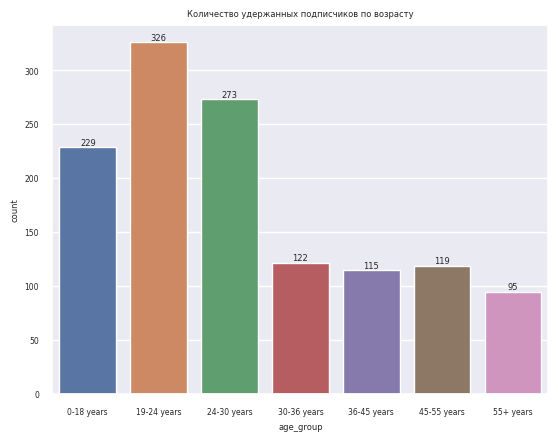

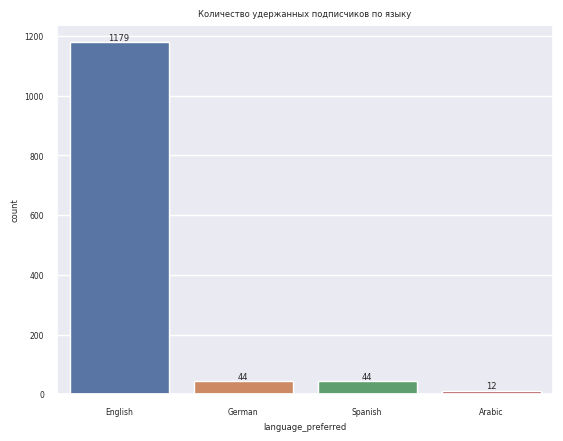

In [41]:
ax1, ax2 = plt.subplots(1)
sns.set(font_scale=0.5)
ax1 = sns.countplot(x='age_group', data=filtered_df)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Количество удержанных подписчиков по возрасту")
plt.show(ax1)
ax2 = sns.countplot(x='language_preferred', data=filtered_df)
for label in ax2.containers:
    ax2.bar_label(label)
plt.title("Количество удержанных подписчиков по языку")
plt.show(ax2)

In [42]:
## Вывод: больше всего удержанных пользователей языка "English", в возрастной группе 19-24 лет.

In [44]:
## Задание 1.7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.
len(df[(df['variant']=='control') & (df['converted']==1)])

371

In [45]:
len(df[(df['variant']=='personalization') & (df['converted']==1)])

705

In [46]:
df_test = pd.DataFrame({'impressions': [10037, 10037],
                   'clicks': [371,705]},
                  index=['var_A', 'var_B'])
df_test.head()

,impressions,clicks
var_A,10037,371
var_B,10037,705


In [48]:
df_test['no_clicks'] = df_test['impressions'] - df_test['clicks']
df_test = df_test.drop(['impressions'], axis = 1)
df_test.head()

,clicks,no_clicks
var_A,371,9666
var_B,705,9332


In [50]:
import scipy.stats as stats
result = stats.chi2_contingency(df_test, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))


chisq = 109.54856645054791, pvalue = 1.2305237452645538e-25


In [51]:
## Вывод: значимость A/B теста менее допустимого уровня значимости (0,05), следовательно нулевую гипотезу (конверсии групп "personalization" и "conrol" одинаковы) отклоняем. Конверсия "personalization" больше и это значимо статистически.

In [52]:
## Задание 2. Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [62]:
def value(x):
    return - 45*x[0] - 80*x[1]

In [63]:
neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5  * x [0] - 20 * x [1],
                                         450 - 10 * x [0] - 15 * x [1]])}

In [64]:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [65]:
from scipy.optimize import minimize
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


In [69]:
doll = value([24, 14])*(-1)
print (doll)

2200


In [70]:
## Вывод: максимальная прибыль составит 2200 долларов при производстве 24 стульев и 14 столов.

In [71]:
## Задание 3. Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4$, day3 0.6$, day7 0.8$, day14 1.10$ , day21 1.30$, day30 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

In [73]:
df_inc = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'retained': [0.4,0.6,0.8,1.10,1.30,1.40]})
df_inc.head(6)

,day,retained
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


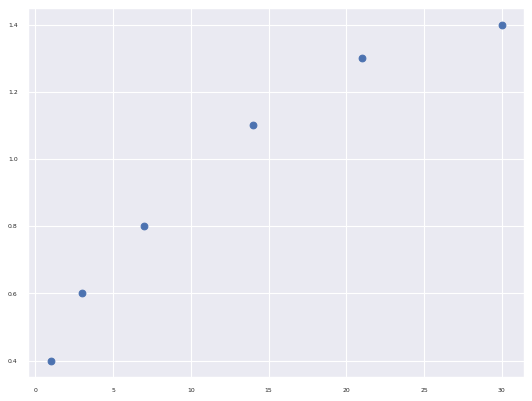

In [76]:
plt.figure(num=None, figsize=(8, 6), dpi=80,)
plt.scatter(df_inc['day'], df_inc['retained'], label="Original Data" )

In [79]:
def log_func( x, a, b):
    return a*np.log10(x)+b

In [80]:
def exp_func( x, a, b):
    return a * b**x

In [81]:
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df_inc['day'], df_inc['retained'])

In [82]:
exp_popt, exp_pcov = curve_fit(exp_func, df_inc['day'], df_inc['retained'])

In [83]:
endpoint = 90

In [84]:
log_y_projected = log_func( np.arange( endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( endpoint ), *exp_popt )

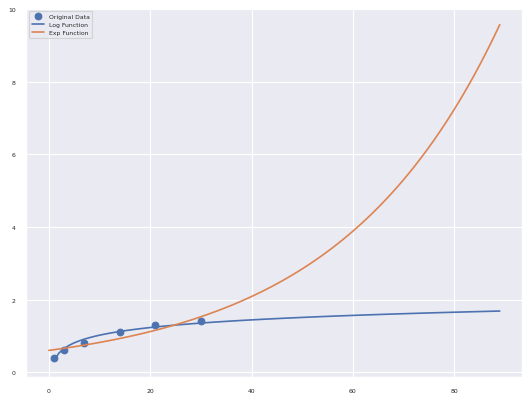

In [86]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.scatter(df_inc['day'], df_inc['retained'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function" )
plt.plot( exp_y_projected, label="Exp Function" )
plt.legend()
plt.show()

In [87]:
print('Прогноз среднего накопленного дохода через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз среднего накопленного дохода через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз среднего накопленного дохода через 90 дней по log модели 2.0
Прогноз среднего накопленного дохода через 90 дней по exp модели 10.0


In [88]:
y_log_pred = [log_y_projected[ i ] for i in list(df_inc['day'])]
y_log_pred

[0.3182915349828918,
 0.6525362979654962,
 0.9103204821057709,
 1.1212054480469356,
 1.2445652450883753,
 1.353080991114816]

In [89]:
y_exp_pred = [exp_y_projected[ i ] for i in list(df_inc['day'])]
y_exp_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

In [ ]:
## Вывод: лучше использовать логарифмическую модель, так как её среднеквадратичная ошибка меньше. Доход на 90-1 день составит 2 доллара.